In [2]:
import tensorflow as tf
import pandas as pd 
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random
from keras.metrics import Precision
from keras.metrics import Recall

In [3]:
path = 'C:\\Users\\Vaani Goel\\Desktop\\Aston\\Dataset_BUSI_with_GT'
data_dir = pathlib.Path(path)

In [4]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['benign', 'malignant', 'normal'], dtype='<U9')

In [5]:
benignPath = os.path.join(data_dir,'benign')
malignantPath = os.path.join(data_dir,'malignant')
normalPath = os.path.join(data_dir,'normal')

In [6]:
imageCount = len(list(data_dir.glob('*/*.png')))
imageCount

1578

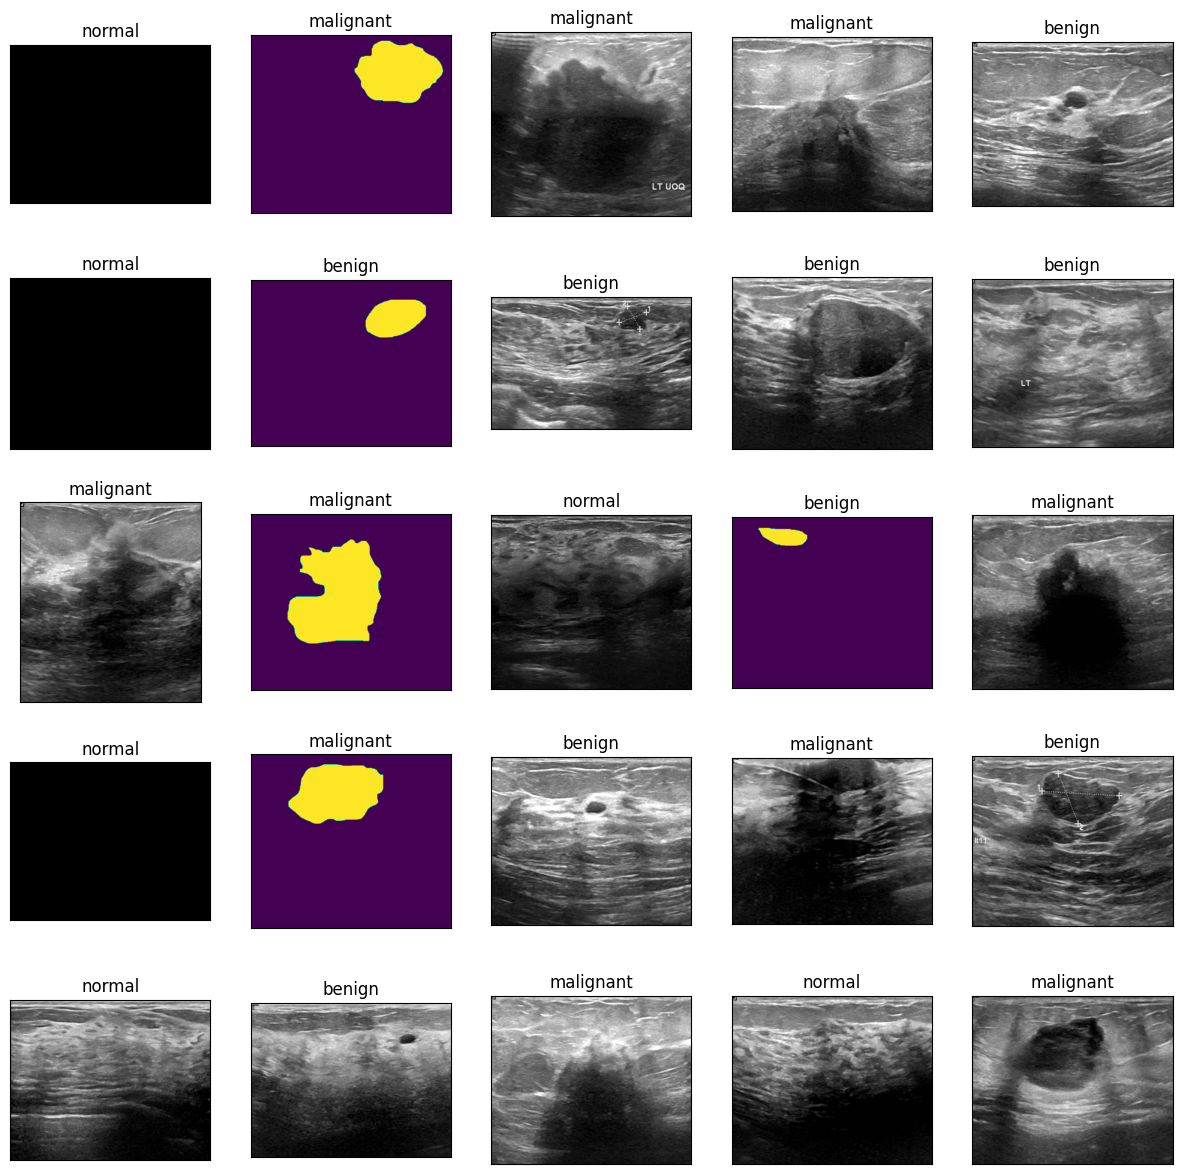

In [7]:
plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.png"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

In [8]:
from pathlib import Path
import imghdr

data_dir = 'C:\\Users\\Vaani Goel\\Desktop\\Aston\\Dataset_BUSI_with_GT'
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

C:\Users\Vaani Goel\AppData\Local\Temp\ipykernel_20616\1902439517.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
batch_size = 32
img_height = 224
img_width = 224

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 1263 files for training.
Found 1578 files belonging to 3 classes.
Using 315 files for validation.


In [11]:
from keras import layers 
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])

In [16]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

Epoch 1/20
40/40 [==============================] - 25s 614ms/step - loss: 0.7167 - accuracy: 0.6793 - val_loss: 0.6592 - val_accuracy: 0.7143
Epoch 2/20
40/40 [==============================] - 23s 553ms/step - loss: 0.5382 - accuracy: 0.7641 - val_loss: 0.6314 - val_accuracy: 0.7651
Epoch 3/20
40/40 [==============================] - 22s 546ms/step - loss: 0.3988 - accuracy: 0.8329 - val_loss: 0.7075 - val_accuracy: 0.7016
Epoch 4/20
40/40 [==============================] - 22s 545ms/step - loss: 0.2932 - accuracy: 0.8892 - val_loss: 0.8694 - val_accuracy: 0.7587
Epoch 5/20
40/40 [==============================] - 23s 563ms/step - loss: 0.2899 - accuracy: 0.9002 - val_loss: 0.8483 - val_accuracy: 0.7365
Epoch 6/20
40/40 [==============================] - 22s 551ms/step - loss: 0.1594 - accuracy: 0.9430 - val_loss: 0.8144 - val_accuracy: 0.7714
Epoch 7/20
40/40 [==============================] - 22s 533ms/step - loss: 0.1210 - accuracy: 0.9644 - val_loss: 0.9793 - val_accuracy: 0.7810

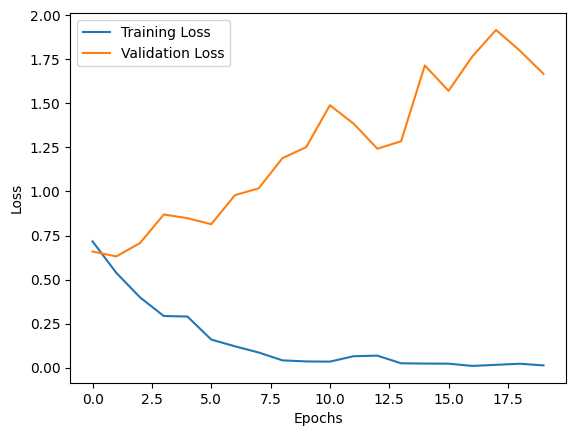

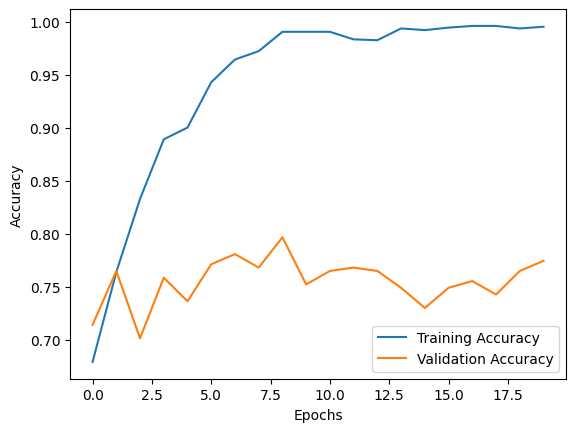

In [18]:
epochs = 20
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

# Plot the loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('model.h5')